In [7]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.yonsei.ac.kr/sc/support/calendar.jsp' # 학사지원 -> 학사일정
res = requests.get(url)

soup = BeautifulSoup(res.text, 'html.parser') 

In [31]:
table = soup.find('table')

In [91]:
headers = [th.text for th in table.select("tr th")]

In [92]:
headers2 = [td.text.replace('\n', '').replace('\t', '').replace('\xa0', ' ').replace('/', '') for td in table.select("tr td")]

In [98]:
output = list(map(lambda x: (int(x.split(' ')[0]), []), headers))

In [99]:
bf = 0
idx = 0

for i in range(0, len(headers2), 2):
    nw = int(headers2[i].split('(')[0])
    if nw < bf: idx += 1
    output[idx][1].append(headers2[i] + headers2[i + 1])
    bf = nw

In [100]:
for i in output:
    print(i[0])
    for j in i[1]:
        print(j)
    print()

2
1(수) 휴 · 복학 접수 시작
13(월)~17(금) 2023-1학기 수강신청
17(금)~23(목) 2023-1학기 등록
22(수) 복학 접수 마감
26(일) 졸업예배
27(월) 학위수여식

3
1(수) 삼일절
2(목) 개강  교무위원회
6(월)~8(수) 수강신청 확인 및 변경
10(금)~13(월) 2023-1학기 추가등록
13(월)~17(금) 조기졸업 신청
15(수) 미등록자 일반 휴학 접수 마감  등록금 전액반환 마감

4
6(목) 교무위원회
7(금) 학기 13선
9(일)~15(토) 고난주간
9(일) 부활절
20(목)~26(수) 중간시험
27(목)~5.3(수) 2023-2학기 캠퍼스내 소속변경 신청
27(목)~5.1(월) 수강철회

5
1(월) 근로자의 날
2(화)~4(목) SU평가 신청
4(목) 교무위원회
5(금) 어린이날
10(수) 은퇴교수의 날
13(토) 창립기념일
15(월) 학기 23선  일반휴학 접수 마감
27(토) 부처님 오신 날

6
1(목) 교무위원회  질병휴학 접수 마감
4(일) 성령강림일
6(화) 현충일
8(목)~14(수) 자율학습 및 보충수업 기간
15(목)~21(수) 학기말 시험
22(목) 여름방학 시작
22(목)~28(수) 2023-2학기 캠퍼스내 복수전공 · 연계전공 신청
26(월) 여름계절제 수업 시작
28(수) 2023-1학기 성적제출 마감

7
17(월) 여름계절제 수업 종료

8
1(화) 휴 · 복학 접수 시작
15(화) 광복절
16(수)~22(화) 2023-2학기 수강신청
18(금)~24(목) 2023-2학기 등록
25(금) 학위수여식  복학 접수 마감



In [113]:
import selenium
from selenium import webdriver

driver = webdriver.Chrome()

In [114]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver.get('https://www.naver.com/') 
driver.implicitly_wait(5)

In [115]:
search = driver.find_element(By.XPATH, '//*[@id="query"]')
search.send_keys('고려대학교')
search.send_keys(Keys.RETURN)

In [120]:
img = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[1]/div/div[2]/a/img')
img = requests.get(img.get_attribute('src')).content
with open('img.jpg', 'wb') as handler:
    handler.write(img)

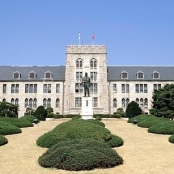

In [121]:
from IPython.display import Image
Image(filename='img.jpg') 

In [122]:
driver.close()